Softmax分类正确率为：76.67% 此时迭代次数为：100,学习率为：0.1
Softmax分类正确率为：88.00% 此时迭代次数为：100,学习率为：0.03
Softmax分类正确率为：76.67% 此时迭代次数为：100,学习率为：0.01
Softmax分类正确率为：32.67% 此时迭代次数为：100,学习率为：0.003
Softmax分类正确率为：70.00% 此时迭代次数为：100,学习率为：0.001
Softmax分类正确率为：33.33% 此时迭代次数为：100,学习率为：0.0003
Softmax分类正确率为：96.67% 此时迭代次数为：500,学习率为：0.1
Softmax分类正确率为：96.67% 此时迭代次数为：500,学习率为：0.03
Softmax分类正确率为：93.33% 此时迭代次数为：500,学习率为：0.01
Softmax分类正确率为：89.33% 此时迭代次数为：500,学习率为：0.003
Softmax分类正确率为：76.67% 此时迭代次数为：500,学习率为：0.001
Softmax分类正确率为：34.00% 此时迭代次数为：500,学习率为：0.0003
Softmax分类正确率为：97.33% 此时迭代次数为：2500,学习率为：0.1
Softmax分类正确率为：97.33% 此时迭代次数为：2500,学习率为：0.03
Softmax分类正确率为：96.67% 此时迭代次数为：2500,学习率为：0.01
Softmax分类正确率为：96.00% 此时迭代次数为：2500,学习率为：0.003
Softmax分类正确率为：80.67% 此时迭代次数为：2500,学习率为：0.001
Softmax分类正确率为：66.67% 此时迭代次数为：2500,学习率为：0.0003
Softmax分类正确率为：97.33% 此时迭代次数为：5000,学习率为：0.1
Softmax分类正确率为：97.33% 此时迭代次数为：5000,学习率为：0.03
Softmax分类正确率为：97.33% 此时迭代次数为：5000,学习率为：0.01
Softmax分类正确率为：96.00% 此时迭代次数为：5000,学习率为：0.003
Softmax分类正确率为：91.33% 此时迭代次数为：5000,学

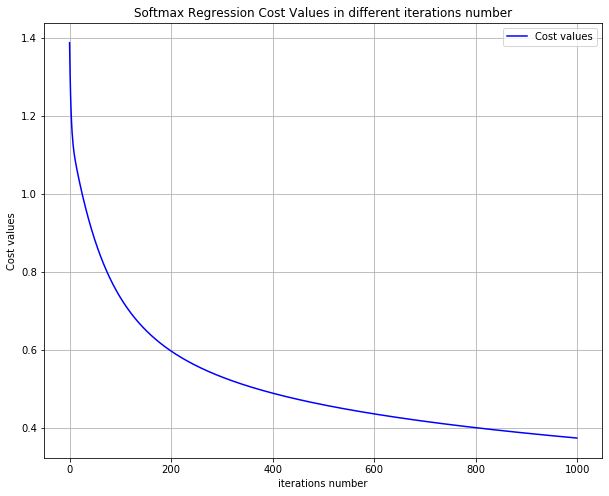

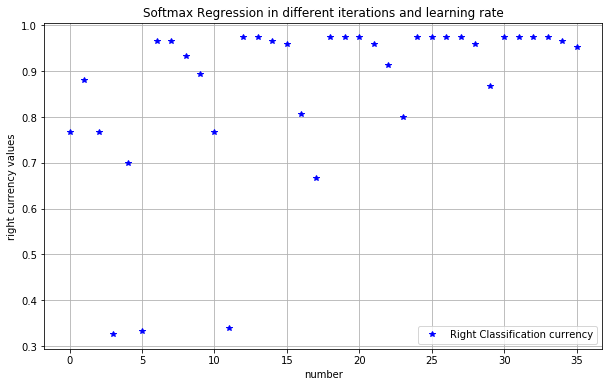

In [80]:
import numpy as np
import matplotlib.pyplot as plt
datafile ='data/iris.txt'
datax = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2,3),unpack=True)
data_x = np.transpose(datax)
datay = np.loadtxt(datafile,delimiter=',',usecols=(4),dtype=str,unpack=True)
data_y = np.transpose(datay)
data_y = np.array(data_y).reshape((data_y.shape[0],1))

#将字符类型数据转换为类别0，1，2
def transfer(x):
    mask0 = x=='Iris-setosa'
    mask1 = x=='Iris-versicolor'
    mask2 = x=='Iris-virginica'
    x[mask0]=0
    x[mask1]=1
    x[mask2]=2
    x=x.astype(np.float)
    return x
data_y = transfer(data_y)

#将类别y进行独热编码，得到one_hot 矩阵
def one_hot(x):
    one_hot = np.zeros((x.shape[0],3))
    mask0 = x==0
    mask1 = x==1
    mask2 = x==2
    for i in range(50):
        one_hot[i]=[1,0,0]
    for j in range(50,100):
        one_hot[j]=[0,1,0]
    for k in range(100,150):
        one_hot[k]=[0,0,1]
    return one_hot
one_hot = one_hot(data_y)


#创建softmax函数
def softmax(x):
    sum_exp = np.sum(np.exp(x),axis=1,keepdims=True)
    softmax = np.exp(x)/sum_exp
    return softmax

def Gradient(x,y_one_hot,n_class,iters =1000,alpha = 0.01,lam=0.01):
    #初始化定义权重矩阵
    W = np.random.rand(n_class,x.shape[1])
    #print(W)
    loss = []#定义损失函数
    #对标签值进行独热编码
    for i in range(iters):#开始迭代，梯度下降
        #计算softmax
        scores = np.dot(x,W.T)
        #得到每一个类别的概率
        probs = softmax(scores)
        #计算损失函数的值并且储存在列表中
        loss_sample = -(1/x.shape[0])*(np.sum(y_one_hot*np.log(probs)))
        loss.append(loss_sample)
        #计算梯度
        dw =-(1/x.shape[0])*np.dot((y_one_hot-probs).T,x)+lam*W
        #更新参数
        dw[:,0] = dw[:,0]-lam*W[:,0]#theta0不需要正则化
        W = W-alpha*dw
    return W,loss#返回权重矩阵以及损失函数的值

#根据得到的权重矩阵对数据进行预测
def predict(x,y,W):
    scores = np.dot(x,W.T)
    probs = softmax(scores)
    return np.argmax(probs,axis=1)
#计算分类准确率
def compute_acurancy(prey,realy):
    rate = 0
    for i in range(realy.shape[0]):
        if(realy[i]==prey[i]):
            rate = rate+1
    
    return float(rate/realy.shape[0])
    
Weight,loss = Gradient(data_x,one_hot,n_class=3)
y_predict = predict(data_x,data_y,Weight)
#计算分类准确率
rate = compute_acurancy(y_predict,data_y)

#观察损失函数的值的分布,通过图像展示出来
#print(loss)
def plot_cost(Cost_list):
    plt.figure(figsize=(10,8))
    plt.grid(True)
    plt.plot(range(len(Cost_list)),Cost_list,'b-',label='Cost values')
    plt.xlabel('iterations number')
    plt.ylabel('Cost values')
    plt.title('Softmax Regression Cost Values in different iterations number')
    plt.legend()

iters_list = [100,500,2500,5000,10000,20000]
alpha_list = [0.1,0.03,0.01,0.003,0.001,0.0003]
def plot_currency(iters_list,alpha_list):
    rate = []
    for i in range(len(iters_list)):
        for j in range(len(alpha_list)):
            Weight,loss = Gradient(data_x,one_hot,n_class=3,iters=iters_list[i],alpha=alpha_list[j])
            y_predict = predict(data_x,data_y,Weight)
            #计算分类准确率
            currency = compute_acurancy(y_predict,data_y)
            print("Softmax分类正确率为：{:.2f}% 此时迭代次数为：{},学习率为：{}".format(currency*100,iters_list[i],alpha_list[j]))
            rate.append(currency)
            #观察损失函数变化
    #总共能得到5x5=25个准确率
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.plot(range(len(rate)),rate,'b*',label='Right Classification currency')
    plt.xlabel('number')
    plt.ylabel('right currency values')
    plt.title('Softmax Regression in different iterations and learning rate')
    plt.legend()
    
plot_cost(loss)
plot_currency(iters_list,alpha_list)

In [28]:
data_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

<built-in method tolist of numpy.ndarray object at 0x000002162883D620>


In [77]:
one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0